<a href="https://colab.research.google.com/github/oksk1111/self_machinelearning/blob/main/selfML_ch07_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%8B%AC%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 데이터 준비
#- 패션 MNIST
#-- keras 프레임워크 내에 패션 MNIST 데이터 있음

from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


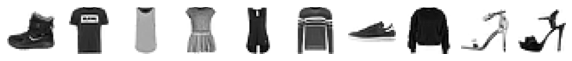

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
# 2. 데이터 확인

# 데이터 크기 확인
print(train_input.shape, train_target.shape)    # 28x28 이미지 6만개
print(test_input.shape, test_target.shape)      # 28x28 이미지 1만개

# 그림으로 input 확인
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))    # subplots(rows, columns, figsize=(width, height))
for i in range(10):     # train_input 데이터 10개까지를 출력해보자!
  axs[i].imshow(train_input[i], cmap='gray_r')      # axs = subplots 의 sub 그래프. index로 구분한다. (axs = plot 처럼 imshow 가능; 자세한건 matplot lib 참고)
  axs[i].axis('off')    # axis() 격자를 그릴지 말지 여부; 기본값은 'on'
plt.show()

# target 확인
print([train_target[i] for i in range(10)])

# fashion MNIST Target 의미
# 0: 티셔츠
# 1: 바지
# 2: 스웨터
# 3: 드레스
# 4: 코트
# 5: 샌달
# 6: 셔츠
# 7: 스니커즈
# 8: 가방
# 9: 앵클 부츠

# 레이블당 샘플 개수 확인; 이미지가 아닌 target 데이터로 확인
import numpy as np
print(np.unique(train_target, return_counts=True))    # 각항목당 6000씩 10개 = 60000 샘플이 있음을 확인

In [ ]:
# 데이터가 60000개로 많아서 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다, 샘플을 하나씩 꺼내서 모델을 훈련하는 방법이 더 효율적으로 보인다.
#- 이런 상황에 잘 맞는 방법이 확률적 경사 하강법! - SGDClassifier  - ?partial_fit() ?
#-- 로지스틱회귀는 데이터 정규화가 필요 - 특성마다 값의 범위가 많이 다르면 올바르게 손실 함수의 경사를 내려 올 수 없기 때문
#--- 위 픽셀값은 0~255 인데 이를 255로 나눠 0~1의 데이터로 정규화 한다. - 이는 양수값으로 이루어진 이미지를 전처리 할 때 많이 이용

# (ch04) SGDClassifier 는 1차원 입력(개별데이터기준)만 받을 수 있어서 reshape 해야 한다.
#- 1차원 데이터가 n개 존재하는 2차원 입력을 받는 것이다!
train_scaled = train_input / 255.0
print(train_scaled[:2])   # 2차원 데이터가 6만개; 총입력이 3차원이 됨. 
train_scaled = train_scaled.reshape(-1, 28*28)    # (-1, ##*##) 2차원 이미지를 1차원으로 변환하는 일반적인 방법; 28*28 은 위 MNist 데이터의 이미지 1개가 28*28 픽셀이기 때문

# 변환된 값 확인
print(train_scaled.shape)
print(train_scaled[:2])   # 1차원 데이터가 6만개; 총입력이 2차원이 됨.

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# 3. 학습 + 평가
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)   #? loss='log'
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)    # 교차검증: 기본 5-Fold 로 전체데이터 5등분중 1개를 검증세트로 지정해 교체해가며 테스트를 수행. (모델, train_data, target_data, n_jobs=-1(=코어 모두 사용))
print(np.mean(scores['test_score']))    # 5-Fold 교차검증의 score 평균

#- 로지스틱 회귀같은 머신러닝으로 성능이 증대되지 않느다. 어떻게 성능 향상?
#--> 딥러닝 라이브러리 이용 - 텐서플로우

0.8195666666666668


# 인공신경망 (Ariticial Neural Network:ANN)
- 입력층 x, 출력층 z <br>
- 출력의 각 단위는 뉴런(=유닛)
***
# 머신러닝
#### 군집알고리즘
#### 선형모델
#### 앙상블
#### 트리모델
#### 딥러닝(인공신경망)
- GPU를 이용해 인공신경망 훈련
***
## 텐서플로우, 케라스 (Tensorflow, Keras)
- 딥러닝 알고리즘 중의 하나
- 케라스 백엔드 라이브러리 = 텐스플로우


In [ ]:
# 딥러닝 라이브러리 - 텐서플로우
#- 딥러닝 라이브러리는 GPU를 사용하여 인공 신경망을 훈련한다.

import tensorflow as tf
from tensorflow import keras

# 인공 신경망에서는 교차검증을 사용하지 않고 검증 세트를 별도로 덜어내어 사용한다.
#- 이유1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
#- 이유2. 교차 검증을 수행하기에는 훈련시간이 너무 오래 걸림

#1. 데이터 준비

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)   # 20% 테스트 세트

# 훈련 세트와 검증 세트의 크기 확인
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)


(38400, 784) (38400,)
(9600, 784) (9600,)


In [ ]:
# train_scaled, train_target 으로 모델 생성 후 val_scaled, val_target 으로 훈련 모델 평가

# 3. 학습 + 평가
#- 딥러닝 학습을 위한 사전 작업인 Layer 만들기가 필요

# 1) dense layer(fully connected layer) 만들기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))    # Dense(뉴런개수, 뉴런의 출력에 적용할 함수, 입력의 크기); 신경망의 첫번째 층에만 input_shape 넣어주면 된다. (나머지는 Sequential 상에서 자동으로 입력)
#- softmax 함수를 쓰는 이유 - 10개의 뉴런에서 출력되는 값을 확률로 바꾸기 위함. 2개 중 하나 선택이면 'sigmoid' 를 넣으면 된다.

# 2) 위 layer 를 가지고 신경망 모델 만들기!
model = keras.Sequential(dense)

# 3) 훈련 이전에 설정: compile() - 손실 함수 지정(loss), 훈련과정에서 측정하고 싶은 측정값 지정(metrics)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
#- 이진 분류: loss = 'binary_crossentropy'
#- 다중 분류: loss = 'categorical_crossentropy' (타겟값이 원-핫 인코딩으로 되어 있어야 함)
#- sparse_categorical_crossentropy - 원-핫 인코딩 없이 정수값으로 바로 엔트로피 손실 함수를 계산할 수 있음
#- 타깃값이 원-핫 인코딩이면 loss='categorical_crossentropy' 를 쓰면 됨
#- keras 는 모델이 훈련할 때 기본으로 에포크마다 손실 값을 출력해 준다.
#-- 손실이 줄어드는 것을 보고 훈련이 잘되었다는 것을 알 수 있지만 정확도를 보이기 위해 metrics='accuracy' 를 지정

# 훈련; 사이킷런의 fit()과 유사
#- fit(입력, 타겟, 반복할 에포크 횟수)
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6067 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4778 - accuracy: 0.8396
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4549 - accuracy: 0.8486
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4446 - accuracy: 0.8528
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4377 - accuracy: 0.8548


In [ ]:
# 5. 검증 - evaluate()
model.evaluate(val_scaled, val_target)

#- 검증세트의 점수는 훈련 세트 점수보다 조금 낮은 것이 일반적!!

375/375 [==============================] - 2s 4ms/step - loss: 0.4553 - accuracy: 0.8482


[0.45525503158569336, 0.8482499718666077]

# 심층신경망 
- 레이어가 여러개인 신경망 (=딥러닝) <br>
- 은닉층(hidden layer): 입력층과 출력층 사이에 있는 층 <br>
- 모든 은닉층은 활성화 함수를 포함한다. (예: 소프트맥스) <br>
- 출력층 활성화함수 종류는 제한적 <br>
> 1. 이진분류일 경우 - 시그모이드 <br>
> 2. 다중분류일 경우 - 소프트맥스 <br>
- 은닉층 활성화 함수는 조금 더 많음 <br>
> 3. ReLU <br>

***
분류 문제는 클래스에 대한 확률을 출력하기 위해 활성화 함수를 사용. <br>
회귀의 출력은 임의의 어떤 숫자이므로 활성화 함수를 적용할 필요가 없다. <br>
즉, 출력층의 선형 방정식의 계산을 그대로 출력한다. <br>
이렇게 하려면 Dense 층의 activation 매개변수에 아무런 값을 지정하지 않는다.

In [ ]:
# 1. 데이터 준비 (위의것과 같은 패션 MNIST)
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
# 1.1. 데이터 전처리

# 28x28 데이터를 1차원으로 변형; 입력데이터를 학습을 위해 2진데이터로!
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)   # 20% 테스트 데이터

print(train_scaled[:2])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# 2. 딥러닝 레이어 만들기 (학습 구성 만들기)

# 만들 구성
#- hidden layer 1(dense) - Sigmoid(활성함수)
#- output layer(dense) - Softmax(활성함수)
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))    # Hidden layer 의 뉴런(여기선 100) 개수는 특별한 기준은 없지만 출력층보다는 많아야 한다. (그래도 경험상 어느정도해야지 하는게 있다고 한다.)
dense2 = keras.layers.Dense(10, activation='softmax')   #? input_shape 없어도 되나봐?

# 심층 심경망(DNN) 만들기
model = keras.Sequential([dense1, dense2])    #* 주의: 출력층은 마지막에 둬야함

# keras는 summary() 를 통해 층에 대한 정보를 얻을 수 있다.
model.summary()
#- layer1구성: 이름(Dense)    (샘플개수(주:미니배치하강법을 이용하기에 전체 샘플개수가 미정. 즉, 현재는None), 뉴런개수100)     특성개수(784)*뉴런개수(100)+절편(100)=78500
#-- keras 의 기본 미니배치 크기=32 (fit() 함수의 batch_size 매개변수로 정의)
#-- 배치차원(=샘플개수): 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원 (현재 예에선 None)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#** layer 를 추가하는 다른 방법 1 - 한번에 생성시에 넣기 **
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),   # 레이어의 이름도 줄 수 있다.
                          keras.layers.Dense(10, activation='softmax', name='output')],
                         name='패션 MNIST 모델')    # 모델의 이름도 줄 수 있다.
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#### layer 를 추가하는 다른 방법 2 - 하나씩 추가하기
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 3. 훈련

# 훈련 전 사전설정 - compile
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

#- 정확도가 0.87 정도됨을 확인
#-- 조금 더 높은 성능을 낼 수 없을까? - 활성화 함수로 ReLU 를 써보자. (이미지 처리에서 높은 성능!)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5634 - accuracy: 0.8086
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4102 - accuracy: 0.8514
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3754 - accuracy: 0.8637
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3526 - accuracy: 0.8711
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3351 - accuracy: 0.8777


In [ ]:
# 이미지 분류 문제에서 높은 성능을 내는 활성화 함수 = ReLU 를 써보자!!

# 유용한 함수 - Flatten : 배치 차원을 제외하고 나머지 입력차원을 모두 일렬로 펼치는 역할 -> 1차원으로 만들어줌

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))   # Flatten은 층처럼 입력층과 은닉층 사이에 추가하기 때문에 층이라 부른다. 다만, 층 개수 계산에선 뺀다. 즉 이 예에선 2개의 층이 있다. 가중치 계산에서도 제외 (Param=0 이된다.)
#- 위 예에서 input_shape(784,)로 쓴걸로 만들어 주는 역할!
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 1. 데이터 준비
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# 3. 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

#- 정확도가 0.88 로 그렇게 개선되지 않았는데??
#-- 그럼 에포크를 늘려보면 어떨까??

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5352 - accuracy: 0.8129
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3940 - accuracy: 0.8581
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3564 - accuracy: 0.8721
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3354 - accuracy: 0.8814
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3180 - accuracy: 0.8868


In [ ]:
# 모델 검증
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8700


[0.37733834981918335, 0.8700000047683716]

## 옵티마이저 (Optimizer)
- compile() 메소드는 케라스의 기본 경사 하강법 알고리즘은 RMSprop 을 사용 <br>
- 옵티마이저 = 케라스의 다양한 종류의 경사 하강법 알고리즘 <br>
- SGD (확률적 경사하강법): 미니배치 하강법 적용 <br>
> momentum: SGD 클래스의 매개변수. 그레디언트 가속도 처럼 모멘텀 최적화 수행. 0.9 이상의 값 지정 <br>
> nesterov: SGD 클래스의 배개변수, 기본값=False, True 일때 사용하며 모멘텀 최적화를 2번 반복하여 구현. 대부분의 경우 기본 확률적 경사하강법보다 더 나은 성능 <br>
- 적응적 학습률(adaptive learning rate): 모델이 최적점에 가까이 갈수록 학습률을 낮춤. 안정적으로 최적점에 수렴할 가능성이 높다. learning_rate 기본값=0.001 <br>
> Adagrad: compile() 메소드의 optimizer='adagrad' 로 선언 <br>
> RMSprop: compile() 메소드의 optimizer='rmsprop' 로 선언 <br>
- Adam: 모멘텀 최적화 + RMSprop

In [ ]:
#** 옵티마이저 **
#- 경사하강법 알고리즘 선택 가능 - optimizer 옵션

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 아래 코드는 위 코드의 동일한 동작
#sgd = keras.optimizers.SGD()
#model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# adam 옵티마이저 이용해서 층 만들기
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#model = keras.Sequential()
#model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
#model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# 3. 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

#- 정확도 0.88 로 그렇게 개선되지 않았는데??

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5226 - accuracy: 0.8187
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3941 - accuracy: 0.8586
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3538 - accuracy: 0.8714
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3274 - accuracy: 0.8799
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3074 - accuracy: 0.8872


## 딥러닝 훈련 그래프 그리기
- keras.fit() 은 훈련 후 history 객체를 리턴한다. <br>
- history 객체에 loss, accuracy 값이 존재한다. <br>

In [1]:
# 1. 데이터 준비
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0    # 0~1 정규화
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# 모델 만들기 (함수로)
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28))) 
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
# 단일 히든 layer 의 모델 확인
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
# history 변수 확인
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
#history = model.fit(train_scaled, train_target, epochs=5, verbose=0)      # verbose = 훈련 과정 출력 조절. 0일 경우 출력하지 않음. 기본값은 1. 2일경우 진행 막대 안보임.
history = model.fit(train_scaled, train_target, epochs=5)

print(history.history.keys())

#- 케라스는 기본적으로 에포크마다 손실을 계산한다!

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5287 - accuracy: 0.8133
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3937 - accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3557 - accuracy: 0.8729
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3335 - accuracy: 0.8806
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3171 - accuracy: 0.8877
dict_keys(['loss', 'accuracy'])


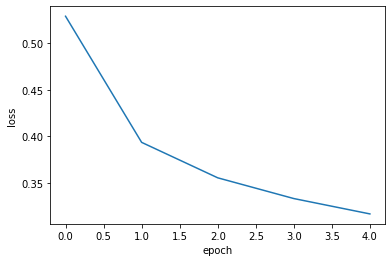

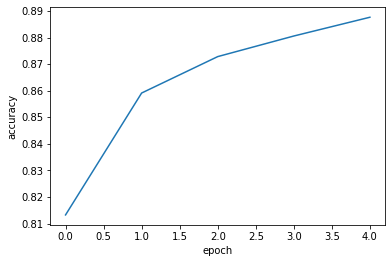

In [5]:
# history 그래프 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#- 에포크가 진행될때마다 loss 는 줄어들고, accuracy 는 늘어남을 확인

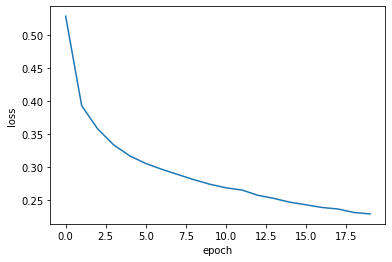

In [ ]:
# 에포크 늘려서 한번 더 확인
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

# 결과 그래프 확인 - 손실 그래프만
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#- loss  가 더 감소함을 육안으로 확인함.
#- 에포크가 늘어난다고 마냥 좋은것은 아니다. 과대적합이 발생할 수 있다.
#-- 과대/과소 적합을 확인하려면 훈련세트/검증세트 모두 그려보아 확인해 보아야 한다.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


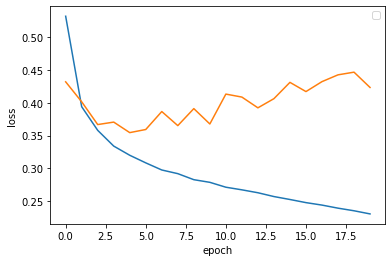

In [6]:
# keras,fit() 메소드에 검증 데이터를 전달하여 검증결과도 함께 받을 수 있다.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))     # 검증데이터는 validation_data=(검증features, 검증타겟) 형태로 값을 준다.

# 결과 항목 확인
print(history.history.keys())   # train 데이터에 대한 loss, accuracy + 검증 데이터에 대한 val_loss, val_accuracy 가 추가됨을 확인!

# 결과 그래프 확인
plt.plot(history.history['loss'])   # train-set 에 대한 loss
plt.plot(history.history['val_loss'])   # valid-set 에 대한 loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train', 'val')
plt.show()

#- epoch=5 이후 과대적합 발생
#-- 과대적합을 피할 수 있는 방법은? 일단 다른 Optimizer 를 써볼까?

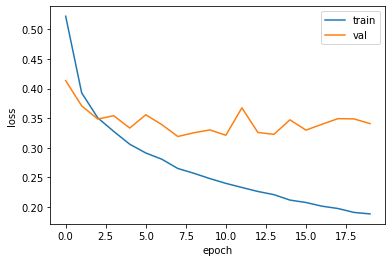

In [ ]:
# 기본옵티마이저인 RMSprop 는 잘 동작하나 이를 대체할 만한건 Adam 이다. 한번 변경해서 테스트해보자.

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')   # optimizer 변경
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#- 'adam' 옵티마이저를 사용시 쬐끔 더 나은 성능을 보임을 확인.
#-- 만족스럽지 못한데, 더 개선할 수 있는 방법은? - 드롭아웃!

## 드롭아웃 (Dropout)
- 학습시 항상 모든것을 학습하는 것이 아닌 규제, 제한을 적용하는 방법 <br>
- 층에 있는 일부 뉴런의 출력을 랜덤하게 제한 후 학습하여 과대적합을 피하는 방식 <br>
- 앙상블과 비슷한 효과 - 앙상블은 과대적합을 막는 머신러닝 알고리즘 기법이다.(ch05) <br>
- ⚠ 드롭아웃은 학습할때만 활용하고, 평가나 예측을 할때는 빼야 한다!! <br>
- keras 에서는 평가할때 자동으로 드롭아웃을 쓰지 않는다. (즉, fit(validation_data=()) 에 넣은 검증데이터는 드롭아웃 제외) <br>

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


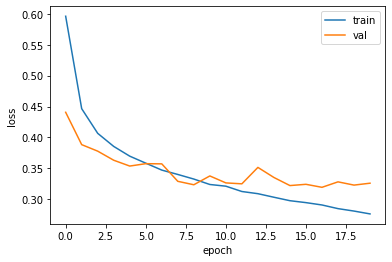

In [7]:
# 모델 준비
model = model_fn(keras.layers.Dropout(0.3))   # 30% dropout 층 추가; 층의 항목 계산에 들어가진 않음 (Flatten 같은것)
model.summary()

# 그래프 확인
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#- 과대적합이 줄었지만 epochs=20 으로는 여전히 과대적합. 한 10정도로 줄이면?

## 모델 저장과 복원
- 딥러닝으로 학습한 모델을 파일로 저장할 수 있다. <br>
- .save_weights(): 모델의 학습된 가중치를 저장 <br>
  - 텐서플로우 체크포인트 포맷으로 파일을 저장 <br>
  - 확장자가 ',h5' 로 할 경우 파일 포맷은 HDF5 <br>
    - HDF5 는 numpy 로 읽기/쓰기 용이한 대용량 파일 포맷 <br>
    - https://docs.h5py.org/en/stable/
```
HDF5 lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. Thousands of datasets can be stored in a single file, categorized and tagged however you want.
```
- .save(): 모델 구조와 모델 파라미터를 함께 저장 <br>
  - 텐서플로우 SavedModel 포맷으로 저장 <br>
  - 확장자가 ',h5' 로 할 경우 파일 포맷은 HDF5 <br>

In [8]:
# epochs=10 으로 재학습
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

# 훈련된 모델파라미터 저장 - save_weights()
model.save_weights('model-weights.h5')

# 훈련된 모델파라미터 + 모델구조 함께 저장 - save()
model.save('model-whole.h5')

In [9]:
# 위 생성된 파일 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Jan 12 14:12 model-weights.h5
-rw-r--r-- 1 root root 982664 Jan 12 14:12 model-whole.h5


In [13]:
# 확인1 - 훈련하지 않은 새로운 모델에 model-weights.h5 를 적용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')    # load_weights(); model 구조가 같아야지만 성립된다!!

# 검증 정확도 확인
#- 케라스의 predict() 는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환 (해당 예에서는 특성이 10개.)
#-- 검증 세트 개수가 12000 개이기 때문에 predict()는 (12000, 10) 크기의 배열을 반환함.
#--- 우리가 원하는 타겟값을 얻기 위해선 10개 확률 중 가장 큰 값을 따로 골라내야 한다.
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)    # argmax()는 항목에서 가장 큰 값의 인덱스를 출력; axis=-1 배열의 마지막 차원을 따라 최댓값을 고름. 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨.
print(val_labels[:5])
print(np.mean(val_labels == val_target))    # 예측한 val_labels 인덱스와 실제 타겟의 인덱스를 비교했을때, 값이 같으면 정확도 1, 값이 틀리면 정확도 0이다. 모든 값에서 정확도를 평균하면 정확도가 된다!!

# 확인2 - model-whole.h5 에서 새로운 모델을 만들어 바로 사용; model 구조 몰라도 됨
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

#- 위의 학습 과정은 20번의 에포크로 모델을 훈련하여 검증한후 값을 조정하여 다시 학습하였다.
#-- 모델을 두번씩 훈련하지 않고 한번에 끝낼 수 있는 방법은? -> keras callback 이용!!

[8 8 7 4 8]
0.8756666666666667
375/375 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8757


[0.3363651633262634, 0.8756666779518127]

## 콜백 (Callback)
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체 <br>
- fit() 메소드의 callbacks 매개변수에 리스트로 전달하여 사용 <br>
- ModelCheckPoint() 콜백을 이용해 기본적으로 최상의 검증 점수를 만드는 모델을 저장하도록 함! <br>

## 조기종료 (Early stopping)
- 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없다. <br>
- keras에서 조기 종료를 위한 EarlyStopping 콜백을 제공 <br>
- 해당 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수 지정
  - 예: patience=2 이면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
- restore_best_weights 매개변수를 True 로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림 <br>

In [14]:
# Callback

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')    # 저장될 파일 이름을 'best-model.h5' 로 지정하여 콜백 적용
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])    # 모델이 훈련된 후 best-model.h5 에 최상의 검증 점수를 낸 모델이 저장

# 위 모델을 load_model() 함수로 다시 읽어서 예측 수행
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8866


[0.3229254484176636, 0.8865833282470703]

In [15]:
# 위 모델은 여전히 20번의 epochs 를 모두 수행한다. 
#-> 해결책: Early stopping

# ModelCheckPoint + EarlyStopping
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)  # 마지막으로 중단된 epoch 출력; patience=2 이므로 최상위 모델은 11이 될 것이다.

11


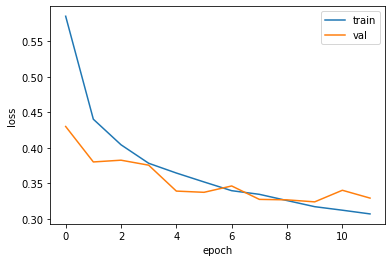

375/375 [==============================] - 1s 2ms/step - loss: 0.3238 - accuracy: 0.8779


[0.32378628849983215, 0.877916693687439]

In [16]:
# 위 결과 그래프로 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 검증
model.evaluate(val_scaled, val_target)